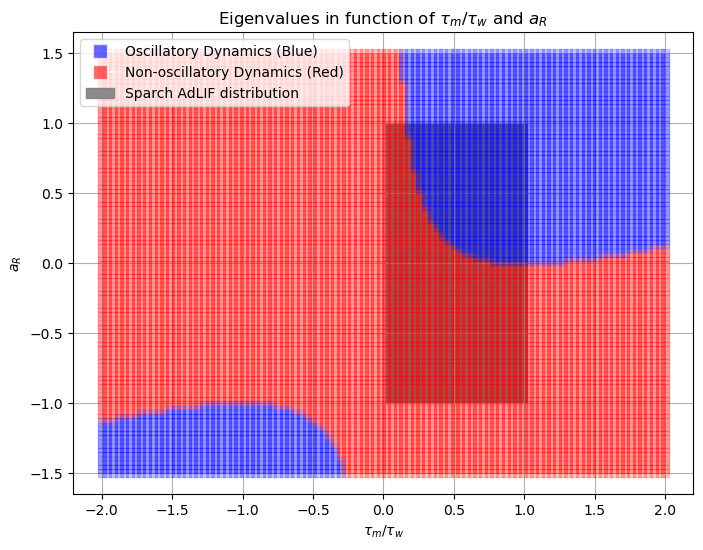

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# Define the function to calculate eigenvalues
def find_system_eigenvalues_numeric(tau_m, tau_w, R, a_w):
    A = np.array([[-1/tau_m, -R/tau_m], [a_w/tau_w, -1/tau_w]])
    eigenvalues_matrix, eigenvectors = np.linalg.eig(A)
    eigenvalues = np.diag(eigenvalues_matrix)
    return eigenvalues, eigenvectors

# Parameters
R = 1  # You may adjust this value for different systems
tau_m_values = np.linspace(-2, 2, 100) 
a_R_values = np.linspace(-1.5, 1.5, 100)

# Set up the plot
plt.figure(figsize=(8, 6))

for tau_m_over_tau_w in tau_m_values:
    for a_R in a_R_values:
        tau_m = 1  # Arbitrary tau_m value
        tau_w = tau_m / tau_m_over_tau_w
        a_w = a_R / R
        eigenvalues, _ = find_system_eigenvalues_numeric(tau_m, tau_w, R, a_w)
        
        # Check if eigenvalues are complex
        if np.iscomplex(eigenvalues).any():
            plt.plot(tau_m_over_tau_w, a_R, 'bs', alpha=0.2)  # Blue dots for complex
        else:
            plt.plot(tau_m_over_tau_w, a_R, 'rs', alpha=0.2)  # Red dots for real

# Add a translucent rectangle over the region (0, -1) to (1, 1)
plt.gca().add_patch(Rectangle((0.0196, -1), 1, 2, color='gray', alpha=1))

# Create custom legend handles with correct colors
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=10, alpha=0.6, label='Oscillatory Dynamics (Blue)'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, alpha=0.6, label='Non-oscillatory Dynamics (Red)'),
    Rectangle((0, 0), 1, 1, color='gray', alpha=0.9, label='Sparch AdLIF distribution')
]

# Add legend
plt.legend(handles=legend_elements, loc='upper left')

# Add labels and title
plt.xlabel(r'$\tau_m / \tau_w$')
plt.ylabel(r'$a_R$')
plt.title('Eigenvalues in function of $\\tau_m / \\tau_w$ and $a_R$')
plt.grid(True)

# Show plot
plt.show()

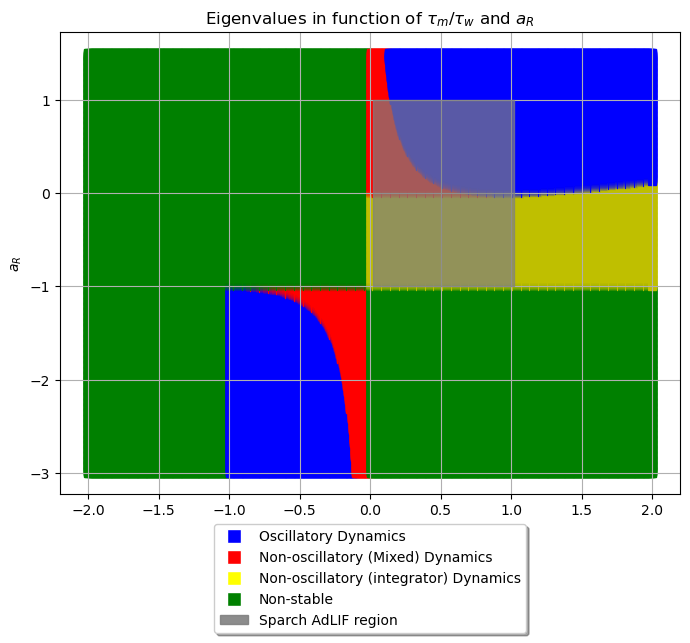

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# Define the function to calculate eigenvalues
def find_system_eigenvalues_numeric(tau_m, tau_w, R, a_w):
    A = np.array([[-1/tau_m, -R/tau_m], [a_w/tau_w, -1/tau_w]])
    eigenvalues_matrix, eigenvectors = np.linalg.eig(A)
    eigenvalues = np.diag(eigenvalues_matrix)
    return eigenvalues, eigenvectors

# Parameters
R = 1  # You may adjust this value for different systems
tau_m_values = np.linspace(-2, 2, 500) 
a_R_values = np.linspace(-3, 1.5, 500)

# Set up the plot
plt.figure(figsize=(8, 6))
plt.gca().add_patch(Rectangle((0.0196, -1), 1, 2, color='gray', alpha=0.7, zorder=2))

for tau_m_over_tau_w in tau_m_values:
    for a_R in a_R_values:
        tau_m = 1  # Arbitrary tau_m value
        tau_w = tau_m / tau_m_over_tau_w
        a_w = a_R / R
        eigenvalues, _ = find_system_eigenvalues_numeric(tau_m, tau_w, R, a_w)
        
        # Compute the Nullstelle (1/tau_w)
        nullstelle = -1 / tau_w
        eigenvalues = [eigenvalues[0][0],eigenvalues[1][1]]
        if (eigenvalues[0]>0 and eigenvalues[0]!=nullstelle) or (eigenvalues[1]>0 and eigenvalues[1]!=nullstelle):
            plt.plot(tau_m_over_tau_w, a_R, 'gs', alpha=1, zorder=1)
        # If eigenvalues are complex
        elif np.iscomplex(eigenvalues).any():
            plt.plot(tau_m_over_tau_w, a_R, 'bs', alpha=1, zorder=1) # Blue dots for complex
        else:

            # Compare Nullstelle with min(eigenvalue)
            if nullstelle > eigenvalues[0] and nullstelle > eigenvalues[1] :
                #print(np.absolute(nullstelle))
                #print(np.absolute(eigenvalues))
                plt.plot(tau_m_over_tau_w, a_R, 'rs', alpha=1, zorder=1)  # Yellow dots if Nullstelle < min(eigenvalue)
            else:
                plt.plot(tau_m_over_tau_w, a_R, 'ys', alpha=1, zorder=1)  # Red dots if Nullstelle >= min(eigenvalue)

# Add a translucent rectangle over the region (0, -1) to (1, 1)

# Create custom legend handles with correct colors
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=10, alpha=1, label='Oscillatory Dynamics'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, alpha=1, label='Non-oscillatory (Mixed) Dynamics'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='yellow', markersize=10, alpha=1, label='Non-oscillatory (integrator) Dynamics'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='green', markersize=10, alpha=1, label='Non-stable'),
    Rectangle((0, 0), 1, 1, color='gray', alpha=0.9, label='Sparch AdLIF region')
]

# Add legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, handles=legend_elements)

# Add labels and title
plt.xlabel(r'$\tau_m / \tau_w$')
plt.ylabel(r'$a_R$')
plt.title('Eigenvalues in function of $\\tau_m / \\tau_w$ and $a_R$')
plt.grid(True)

# Show plot
plt.show()


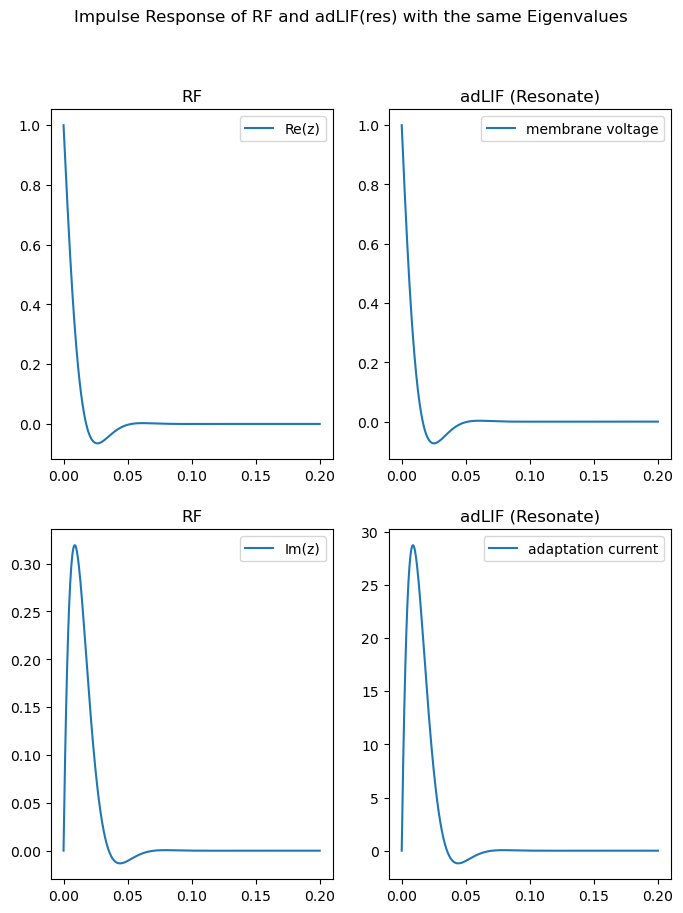

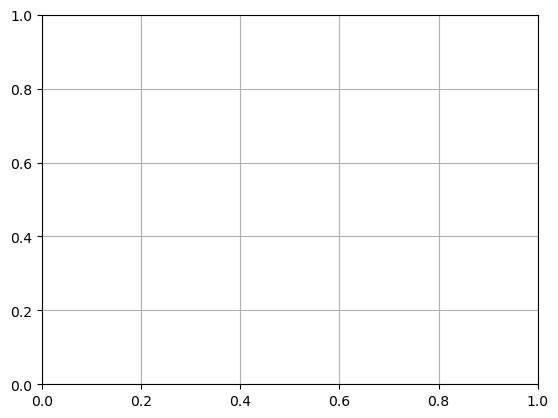

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, impulse

# Define parameters
tau_m = 0.01
R = 0.01

tau_m_over_tau_w_Int = 0.1
a_R_Int = -0.5
tau_w_Int = tau_m / tau_m_over_tau_w_Int
a_w_Int = a_R_Int / R

tau_m_over_tau_w_Res = 0.8
a_R_Res = 1
tau_w_Res = tau_m / tau_m_over_tau_w_Res
a_w_Res = a_R_Res / R

tau_m_over_tau_w_Mix = 0.1
a_R_Mix = 0.5
tau_w_Mix = tau_m / tau_m_over_tau_w_Mix
a_w_Mix = a_R_Mix / R

# Define A matrices
A_Int = np.array([[-1/tau_m, -R/tau_m],
                  [a_w_Int/tau_w_Int, -1/tau_w_Int]])

A_Res = np.array([[-1/tau_m, -R/tau_m],
                  [a_w_Res/tau_w_Res, -1/tau_w_Res]])

A_Mix = np.array([[-1/tau_m, -R/tau_m],
                  [a_w_Mix/tau_w_Mix, -1/tau_w_Mix]])

# Compute eigenvalues of A_Res and construct A_ResOrig
EVs_res = np.linalg.eigvals(A_Res)
A_ResOrig = np.array([[np.real(EVs_res[0]), -np.imag(EVs_res[0])],
                      [np.imag(EVs_res[0]), np.real(EVs_res[0])]])

# Define other matrices
A_LIF = np.array([[-1/tau_m]])
B = np.array([[R/tau_m], [0]])  # Corrected size (2, 1)
B_LIF = np.array([[R/tau_m]])  # Corrected size (1, 1)
C = np.eye(2)  # Output matrix for 2 state variables
C_LIF = np.array([[1]])  # Output matrix for LIF (1, 1)
D = np.zeros((2, 1))  # Corrected size (2, 1), matching C and B
D_LIF = np.array([[0]])  # For LIF system

# Define state-space systems
sysadLIF_Integ = StateSpace(A_Int, B, C, D)
sys_LIF = StateSpace(A_LIF, B_LIF, C_LIF, D_LIF)
sys_adLIF_Res = StateSpace(A_Res, B, C, D)
sys_adLIF_Mix = StateSpace(A_Mix, B, C, D)
sys_Res = StateSpace(A_ResOrig, B, C, D)

# Define time vector (0 to 0.5 seconds)

# Define time vector (0 to 0.5 seconds)
T = np.linspace(0, 0.2, 500)
'''
# Create subplots for state variable 1
fig, axs = plt.subplots(2, 1, figsize=(8, 10))

# Plot impulse responses for state variable 1
t, y = impulse(sysadLIF_Integ, T=T)
axs[0].plot(t, y[:, 0], label='adLIF (Integrate)')

t, y = impulse(sys_adLIF_Mix, T=T)
axs[0].plot(t, y[:, 0], label='adLIF (Mixed)')

t, y = impulse(sys_adLIF_Res, T=T)
axs[0].plot(t, y[:, 0], label='adLIF (Resonate)')

t, y = impulse(sys_Res, T=T)
axs[0].plot(t, y[:, 0], label='RF')

t, y = impulse(sys_LIF, T=T)
axs[0].plot(t, y, label='LIF')

axs[0].legend()
axs[0].grid(True)
axs[0].set_title('Impulse Responses for State Variable 1 (Membrane Voltage) tau_m = 10ms')

# Plot impulse responses for state variable 2
t, y = impulse(sysadLIF_Integ, T=T)
axs[1].plot(t, y[:, 1], label='adLIF (Integrate)')

t, y = impulse(sys_adLIF_Mix, T=T)
axs[1].plot(t, y[:, 1], label='adLIF (Mixed)')

t, y = impulse(sys_adLIF_Res, T=T)
axs[1].plot(t, y[:, 1], label='adLIF (Resonate)')

t, y = impulse(sys_Res, T=T)
axs[1].plot(t, y[:, 1], label='RF')

axs[1].legend()
axs[1].grid(True)
axs[1].set_title('Impulse Responses for State Variable 2 (Adaptation Current)')

plt.tight_layout()
plt.show()
'''
fig, axs = plt.subplots(2, 2, figsize=(8, 10))

# Second plot for sys_Res and sys_adLIF_Res
plt.figure()
t, y = impulse(sys_Res, T=T)
axs[0][0].plot(t, y[:, 0], label='Re(z)')

t, y = impulse(sys_adLIF_Res, T=T)
axs[0][1].plot(t, y[:, 0], label='membrane voltage')
t, y = impulse(sys_Res, T=T)
axs[1][0].plot(t, y[:, 1], label='Im(z)')

t, y = impulse(sys_adLIF_Res, T=T)
axs[1][1].plot(t, y[:, 1], label='adaptation current')

axs[0][0].legend()
axs[0][0].set_title('RF')
axs[1][0].set_title('RF')
axs[0][1].set_title('adLIF (Resonate)')
axs[1][1].set_title('adLIF (Resonate)')
axs[0][1].legend()
axs[1][0].legend()
axs[1][1].legend()
plt.grid(True)
fig.suptitle('Impulse Response of RF and adLIF(res) with the same Eigenvalues')
plt.show()



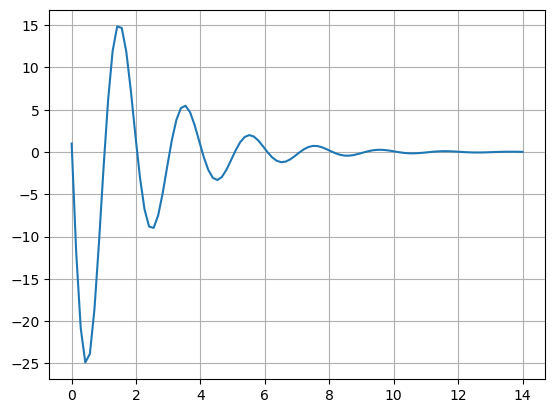

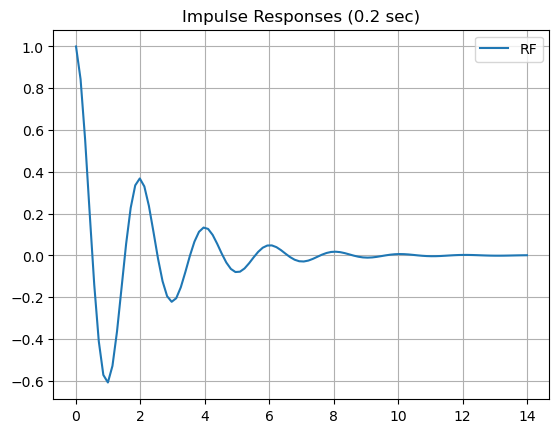

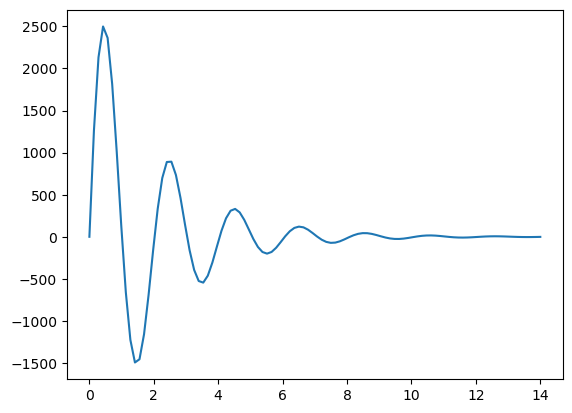

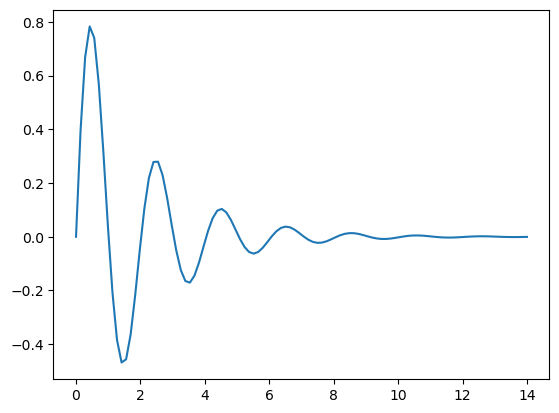

/tmp/ipykernel_368666/3065206825.py:89: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


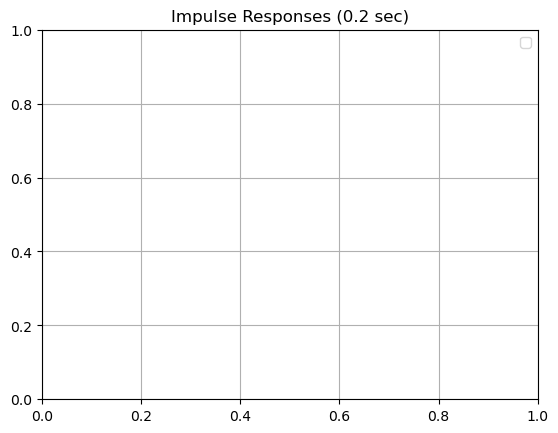

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import StateSpace, impulse

# Define parameters
tau_m = 0.01
R = 0.01

tau_m_over_tau_w_Int = 0.1
a_R_Int = -0.5
tau_w_Int = tau_m / tau_m_over_tau_w_Int
a_w_Int = a_R_Int / R

tau_m_over_tau_w_Res = -0.99
a_R_Res = -1.001
tau_w_Res = tau_m / tau_m_over_tau_w_Res
a_w_Res = a_R_Res / R

tau_m_over_tau_w_Mix = 0.1
a_R_Mix = 0.5
tau_w_Mix = tau_m / tau_m_over_tau_w_Mix
a_w_Mix = a_R_Mix / R

# Define A matrices
A_Int = np.array([[-1/tau_m, -R/tau_m],
                  [a_w_Int/tau_w_Int, -1/tau_w_Int]])

A_Res = np.array([[-1/tau_m, -R/tau_m],
                  [a_w_Res/tau_w_Res, -1/tau_w_Res]])

A_Mix = np.array([[-1/tau_m, -R/tau_m],
                  [a_w_Mix/tau_w_Mix, -1/tau_w_Mix]])

# Compute eigenvalues of A_Res and construct A_ResOrig
EVs_res = np.linalg.eigvals(A_Res)
A_ResOrig = np.array([[np.real(EVs_res[0]), -np.imag(EVs_res[0])],
                      [np.imag(EVs_res[0]), np.real(EVs_res[0])]])

# Define other matrices
A_LIF = np.array([[-1/tau_m]])
B = np.array([[R/tau_m], [0]])  # Corrected size (2, 1)
B_LIF = np.array([[R/tau_m]])  # Corrected size (1, 1)
C = np.eye(2)  # Output matrix for 2 state variables
C_LIF = np.array([[1]])  # Output matrix for LIF (1, 1)
D = np.zeros((2, 1))  # Corrected size (2, 1), matching C and B
D_LIF = np.array([[0]])  # For LIF system

# Define state-space systems
sysadLIF_Integ = StateSpace(A_Int, B, C, D)
sys_LIF = StateSpace(A_LIF, B_LIF, C_LIF, D_LIF)
sys_adLIF_Res = StateSpace(A_Res, B, C, D)
sys_adLIF_Mix = StateSpace(A_Mix, B, C, D)
sys_Res = StateSpace(A_ResOrig, B, C, D)

# Define time vector (0 to 0.5 seconds)


plt.figure()

t, y = impulse(sys_adLIF_Res)
plt.grid(True)
plt.plot(t, y[:, 0], label='adLIF (Resonate)')
plt.show()

plt.figure()

t, y = impulse(sys_Res)
plt.grid(True)

plt.plot(t, y[:, 0], label='RF')


plt.legend()
plt.grid(True)
plt.title('Impulse Responses (0.2 sec)')
plt.show()

plt.figure()

t, y = impulse(sys_adLIF_Res)
plt.plot(t, y[:, 1], label='adLIF (Resonate)')
plt.show()

plt.figure()
t, y = impulse(sys_Res)
plt.plot(t, y[:, 1], label='RF')
plt.show()

plt.legend()
plt.grid(True)
plt.title('Impulse Responses (0.2 sec)')
plt.show()



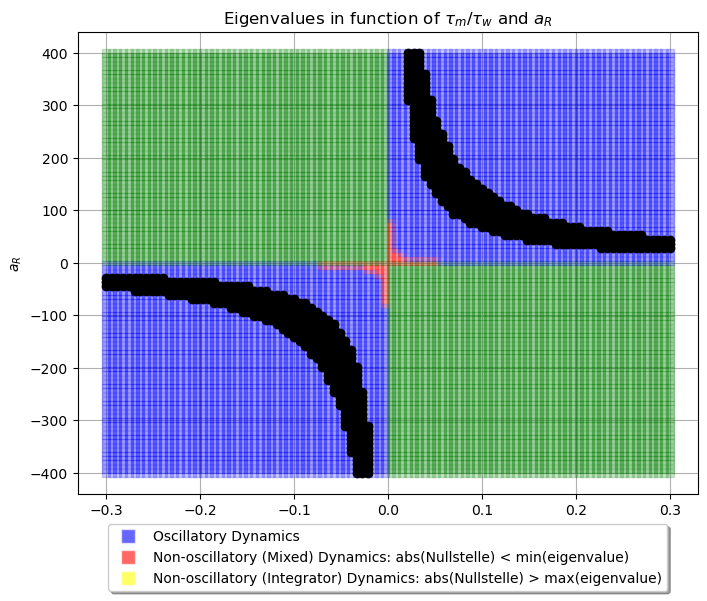

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

# Define the function to calculate eigenvalues
def find_system_eigenvalues_numeric(tau_m, tau_w, R, a_w):
    A = np.array([[-1/tau_m, -R/tau_m], [a_w/tau_w, -1/tau_w]])
    eigenvalues_matrix, eigenvectors = np.linalg.eig(A)
    eigenvalues = np.diag(eigenvalues_matrix)
    return eigenvalues, eigenvectors

# Parameters
R = 1  # You may adjust this value for different systems
tau_m_values = np.linspace(-0.3, 0.3, 100) 
a_R_values = np.linspace(-400, 400, 100)

# Set up the plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Store eigenvalues and coordinates for second pass
points = []

for tau_m_over_tau_w in tau_m_values:
    for a_R in a_R_values:
        tau_m = 1  # Arbitrary tau_m value
        tau_w = tau_m / tau_m_over_tau_w
        a_w = a_R / R
        eigenvalues, _ = find_system_eigenvalues_numeric(tau_m, tau_w, R, a_w)
        
        # Compute the Nullstelle (1/tau_w)
        nullstelle = -1 / tau_w
        eigenvalue_1, eigenvalue_2 = eigenvalues[0][0], eigenvalues[1][1]
        points.append((tau_m_over_tau_w, a_R, eigenvalue_1, eigenvalue_2))  # Store for later check
        
        # Plot based on conditions
        if (eigenvalue_1 > 0 and eigenvalue_1 != nullstelle) or (eigenvalue_2 > 0 and eigenvalue_2 != nullstelle):
            ax.plot(tau_m_over_tau_w, a_R, 'gs', alpha=0.2)
        elif np.iscomplex(eigenvalues).any():
            ax.plot(tau_m_over_tau_w, a_R, 'bs', alpha=0.2)  # Blue dots for complex
        else:
            if nullstelle > eigenvalue_1 and nullstelle > eigenvalue_2:
                ax.plot(tau_m_over_tau_w, a_R, 'rs', alpha=0.2)  # Red dots if Nullstelle < min(eigenvalue)
            else:
                ax.plot(tau_m_over_tau_w, a_R, 'ys', alpha=0.2)  # Yellow dots if Nullstelle >= min(eigenvalue)

# Add a translucent rectangle over the region (0, -1) to (1, 1)
#ax.add_patch(Rectangle((0.0196, -1), 1, 2, color='gray', alpha=1))

# Create custom legend handles with correct colors
legend_elements = [
    Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=10, alpha=0.6, label='Oscillatory Dynamics'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='red', markersize=10, alpha=0.6, label='Non-oscillatory (Mixed) Dynamics: abs(Nullstelle) < min(eigenvalue)'),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='yellow', markersize=10, alpha=0.6, label='Non-oscillatory (Integrator) Dynamics: abs(Nullstelle) > max(eigenvalue)'),
    #Rectangle((0, 0), 1, 1, color='gray', alpha=0.9, label='Sparch AdLIF Distribution')
]

# Add legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, handles=legend_elements)
# Add labels and title
ax.set_xlabel(r'$\tau_m / \tau_w$')
ax.set_ylabel(r'$a_R$')
ax.set_title('Eigenvalues in function of $\\tau_m / \\tau_w$ and $a_R$')
ax.grid(True)

# Second pass to check conditions for additional black dots
for tau_m_over_tau_w, a_R, eigenvalue_1, eigenvalue_2 in points:
    if np.iscomplex(eigenvalue_1) and np.iscomplex(eigenvalue_2):
        real_part = eigenvalue_1.real
        imaginary_part = eigenvalue_1.imag
        if -0.75 < real_part < -0.25 and 2.5 < imaginary_part < 3.75:
            ax.plot(tau_m_over_tau_w, a_R, 'ko')  # Black dot if conditions are met
           

# Show the plot
plt.show()


In [50]:
from sympy import symbols, Eq, solve, sqrt, pi

# Define symbols
rat, R_a = symbols('rat R_a')

# Given values
tau_m = 0.01
real_value = -0.5
img_value = 3*pi

# Define the equations
eq1 = Eq(-(rat + 1) / (2*tau_m), real_value)
eq2 = Eq(sqrt((rat**2 - 2*rat + 1 - 4*R_a * rat)*(-1)) / (2 * tau_m), img_value)

# Solve the system of equations
solutions = solve([eq1, eq2], (rat, R_a))

solutions


[(-0.990000000000000, -1.00899762016261)]

In [39]:
tau_m = 0.01
R = 0.01


tau_m_over_tau_w_Res = -0.990000000
a_R_Res = -1.00102218226274
tau_w_Res = tau_m / tau_m_over_tau_w_Res
a_w_Res = a_R_Res / R


A_Res = np.array([[-1/tau_m, -R/tau_m],
                  [a_w_Res/tau_w_Res, -1/tau_w_Res]])

EVs_res = np.linalg.eigvals(A_Res)
print(EVs_res)

[-0.5+3.14159265j -0.5-3.14159265j]
